Exploration of write-rnn-tensorflow.

In [1]:
import tensorflow as tf
import sys
import os
import pickle

In [2]:
WRITE_RNN_DIR = '../../write-rnn-tensorflow'

In [3]:
sys.path.append(WRITE_RNN_DIR)

In [4]:
from model import Model
from utils import *

In [5]:
with open(os.path.join(WRITE_RNN_DIR, 'save', 'config.pkl'), 'rb') as f:
    saved_args = pickle.load(f)

In [6]:
print(saved_args)

Namespace(batch_size=50, data_scale=20, decay_rate=0.95, grad_clip=10.0, keep_prob=0.8, learning_rate=0.005, model='lstm', num_epochs=30, num_layers=2, num_mixture=20, rnn_size=256, save_every=500, seq_length=300)


In [7]:
tf.reset_default_graph()
model = Model(saved_args, True)

In [8]:
sess = tf.InteractiveSession()

In [9]:
saver = tf.train.Saver()

In [10]:
ckpt = tf.train.get_checkpoint_state(os.path.join(WRITE_RNN_DIR, 'save'))

In [11]:
print("loading model: ", ckpt.model_checkpoint_path)

loading model:  ../../write-rnn-tensorflow/save/model.ckpt-11000


In [12]:
saver.restore(sess, ckpt.model_checkpoint_path)

In [13]:
sample_args_length = 800
sample_args_scale_factor = 10
sample_args_filename = 'notebook'

In [14]:
[strokes, params] = model.sample(sess, sample_args_length)

In [15]:
print(strokes)

[[-573.75244141 -222.39060974    0.        ]
 [  -2.26897097    1.17833936    0.        ]
 [  -9.45347404    5.56924057    0.        ]
 ..., 
 [  17.28891182    9.26306343    0.        ]
 [  20.01392174    1.44230127    0.        ]
 [  27.43754959   -6.51306438    0.        ]]


In [16]:
print(len(strokes))

800


In [17]:
print(strokes[10:20])

[[  6.94841862  -0.18290116   0.        ]
 [ 16.15675735  -8.24174595   0.        ]
 [ 24.29215622  -4.32109642   0.        ]
 [ 23.47994232  -7.0600338    0.        ]
 [ 19.93389511  -9.42363071   0.        ]
 [ 20.34504128  -1.20279646   0.        ]
 [ 22.14898682   8.93504524   0.        ]
 [ 16.65736961  13.46195221   0.        ]
 [ 12.49457264  18.64097214   0.        ]
 [ 11.49074554  20.11575508   0.        ]]


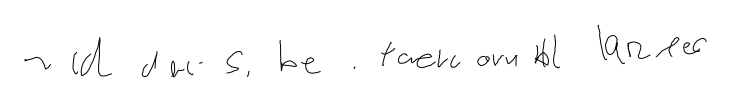

In [18]:
draw_strokes(strokes, factor=sample_args_scale_factor, svg_filename = sample_args_filename+'.normal.svg')

In [19]:
[strokes, params] = model.sample(sess, sample_args_length)

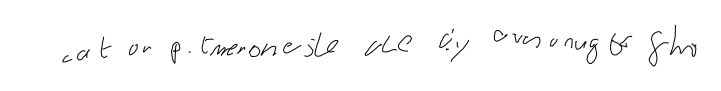

In [20]:
draw_strokes(strokes, factor=sample_args_scale_factor, svg_filename = sample_args_filename+'.normal.svg')

In [21]:
[strokes, params] = model.sample(sess, 5000)

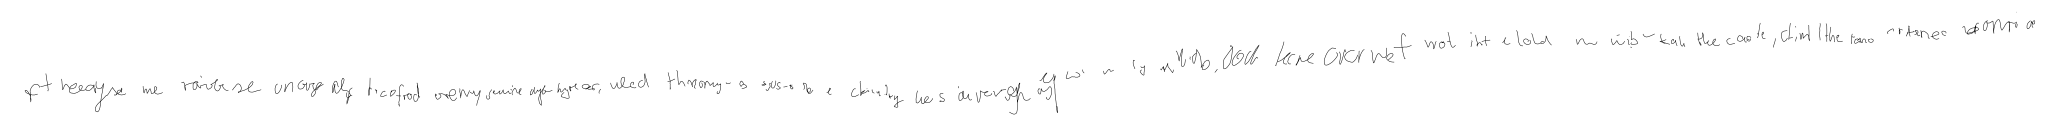

In [22]:
draw_strokes(strokes, factor=sample_args_scale_factor, svg_filename = sample_args_filename+'.normal.svg')

In [58]:
import cairosvg

ImportError: No module named 'cairo'

In [23]:
[strokes, params] = model.sample(sess, sample_args_length)

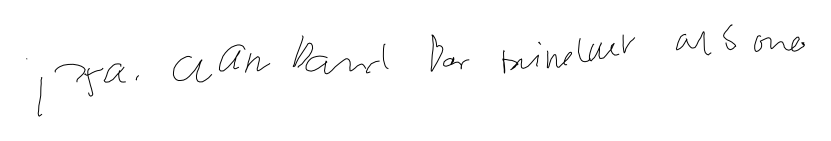

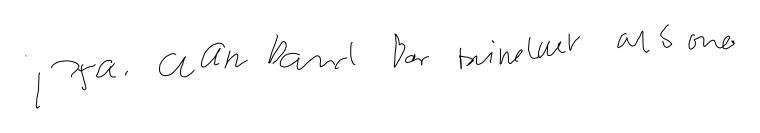

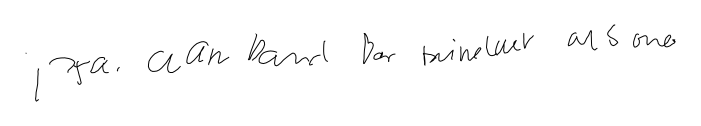

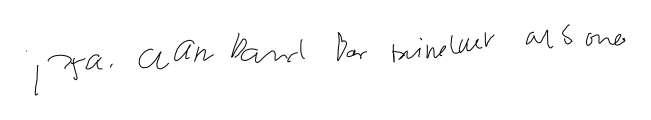

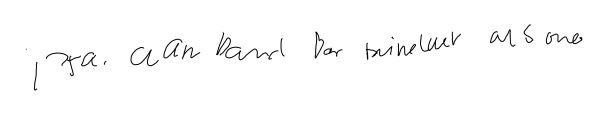

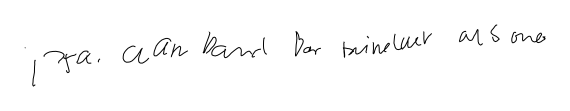

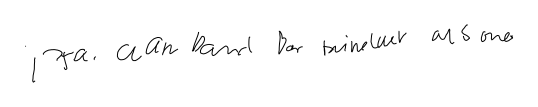

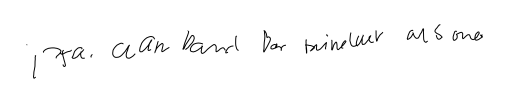

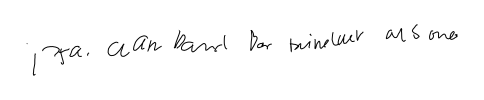

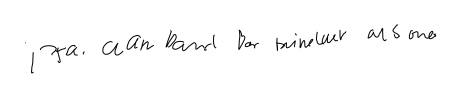

In [26]:
for i in range(10, 20):
    draw_strokes(strokes, factor=i, svg_filename = sample_args_filename+'.normal.svg')

In [27]:
print(params)

[[array([  2.81272907e-08,   1.39695018e-07,   1.12510376e-01,
         1.33754824e-07,   7.30372207e-09,   7.98301528e-07,
         6.11485689e-07,   1.14530586e-01,   1.42603156e-07,
         1.44168187e-03,   1.68488441e-07,   4.47246507e-02,
         2.54835157e-07,   4.79260542e-08,   3.33795676e-08,
         2.90451787e-08,   4.19076457e-07,   7.26789892e-01,
         6.72300127e-09,   3.11987520e-08], dtype=float32), array([  1.50872326,   0.72017717,   2.65906787,  -1.35130608,
        -1.76026607,  -0.29980236,   0.66889524, -12.17769432,
         0.71109402,  -0.44321427,  -0.73292398,   3.6122241 ,
        -0.61211026,   0.6362831 ,   0.91666543,   0.31130821,
        -0.1042452 ,  14.9414835 ,   0.19142838,  -0.89747488], dtype=float32), array([-0.22957166, -2.13091016, -3.82186246,  0.74634862, -0.54791212,
        1.8236351 , -0.40154588, -7.39448929, -0.30400336,  0.44202396,
        1.52323198, -2.20562387,  2.18638515, -0.70987505, -2.22540689,
        0.89006907, -0.0

In [29]:
print(len(params))

800


In [30]:
print(params[100])

[array([  3.16037565e-01,   5.83072156e-02,   1.00927125e-03,
         4.60660551e-04,   7.79817696e-04,   8.03071482e-04,
         3.89138237e-03,   6.12923875e-04,   2.76158680e-03,
         8.07696860e-03,   1.33135589e-04,   1.85123517e-03,
         5.87645627e-05,   2.26671427e-01,   3.61260593e-01,
         5.18273329e-04,   3.81115504e-04,   3.05184047e-04,
         1.55882426e-02,   4.91619692e-04], dtype=float32), array([ 0.96831572,  1.04244459,  2.90390396,  1.09862268,  1.53922844,
        1.33083189,  0.77858835,  0.49641901,  0.90379125,  1.64118958,
        1.22637188,  2.99599361,  1.01007116,  0.98611772,  0.97176445,
        1.16180348,  0.51472229,  4.84602785,  1.01479006,  1.37100327], dtype=float32), array([-0.76326746, -0.79587531, -3.50547552, -0.69816655, -1.02568257,
       -0.99343038, -0.69774795, -1.38220108, -0.95304203, -1.53315401,
       -0.73612171, -3.12587595, -0.27046597, -0.77936184, -0.80279863,
       -0.96747321, -0.45631406, -3.39206433, -0.595

In [33]:
min_x, max_x, min_y, max_y = get_bounds(strokes, 10)
le = max_x - min_x
he = max_y - min_y
print(le, he)

781.4936186991162 91.6550019957125


In [50]:
GIF_STEP = 30

In [92]:
def draw_inter_strokes(data, factor, min_x, max_x, min_y, max_y):
    
    dims = (50 + max_x - min_x, 50 + max_y - min_y)
    
    dwg = svgwrite.Drawing('temp.svg', size=dims)
    dwg.add(dwg.rect(insert=(0, 0), size=dims,fill='white'))
    
    lift_pen = 1
    
    abs_x = 25 - min_x 
    abs_y = 25 - min_y
    p = "M%s,%s " % (abs_x, abs_y)
    
    command = "m"

    for i in range(len(data)):
        if (lift_pen == 1):
            command = "m"
        elif (command != "l"):
            command = "l"
        else:
            command = ""    
        x = float(data[i,0])/factor
        y = float(data[i,1])/factor
        lift_pen = data[i, 2]
        p += command+str(x)+","+str(y)+" "
    
    the_color = "black"
    stroke_width = 1
    
    dwg.add(dwg.path(p).stroke(the_color,stroke_width).fill("none"))
    dwg.save()
    return dwg

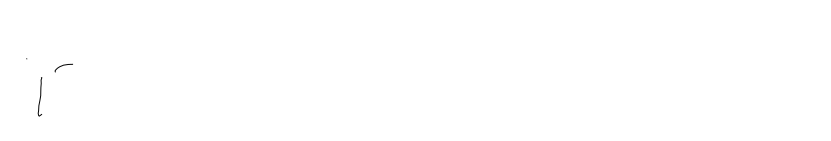

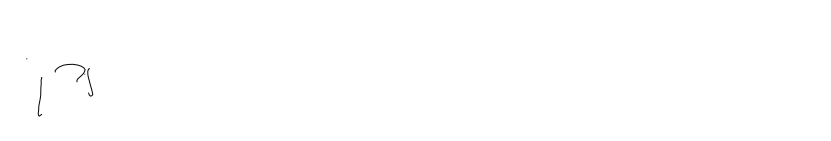

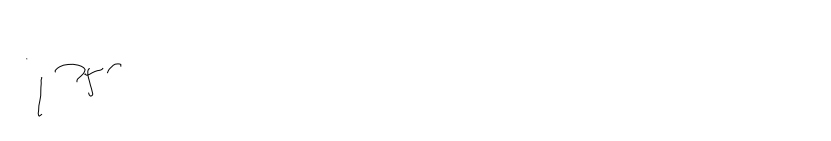

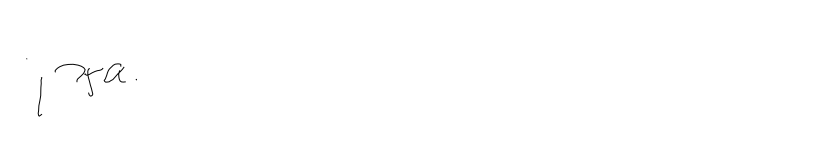

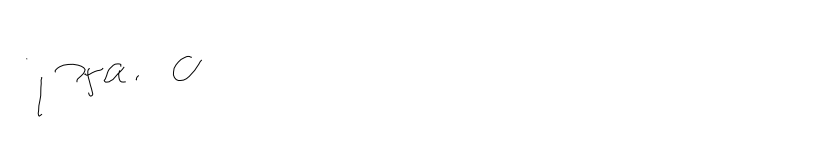

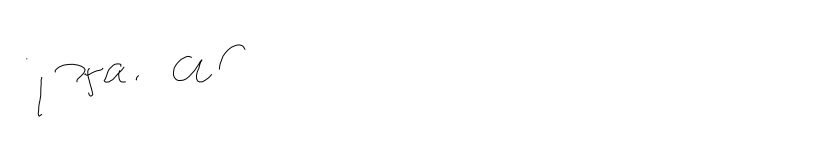

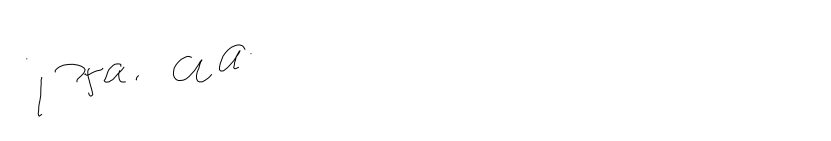

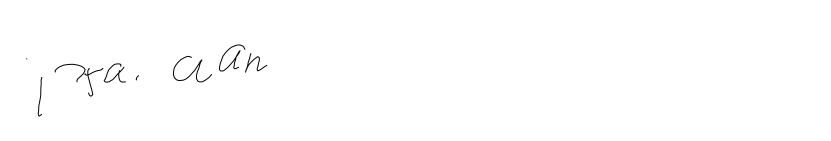

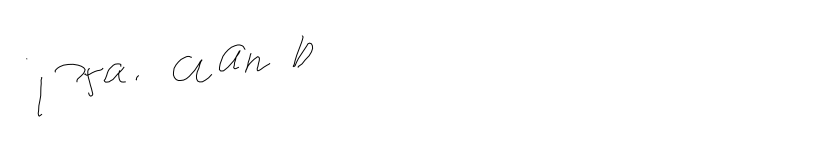

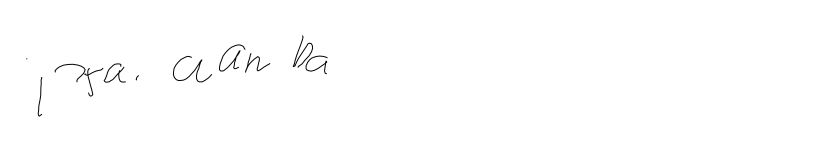

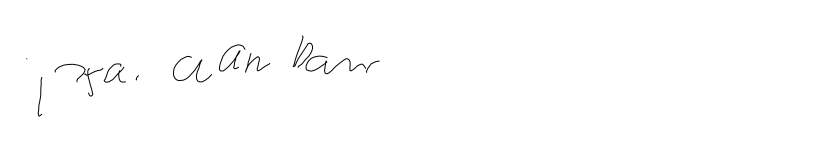

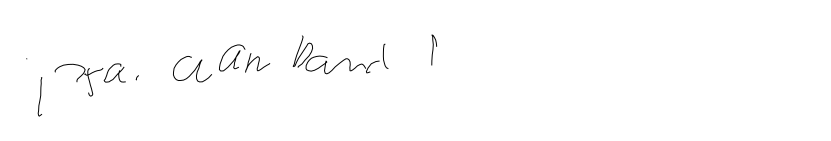

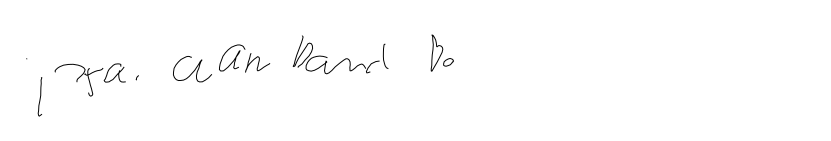

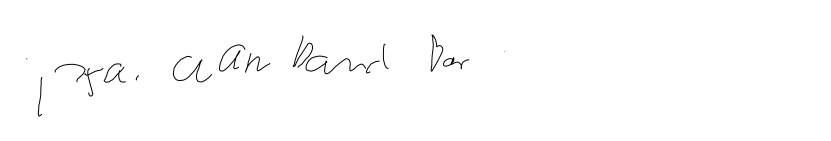

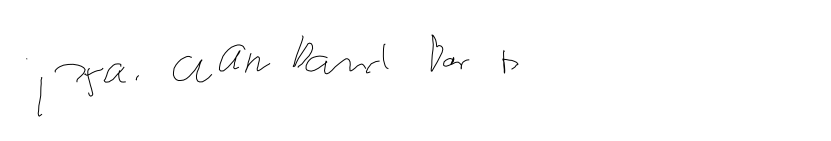

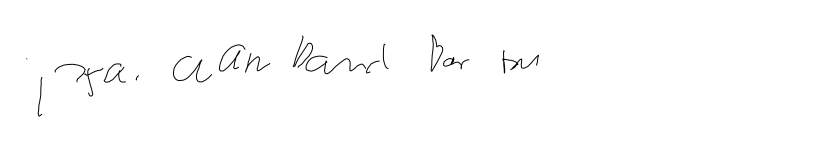

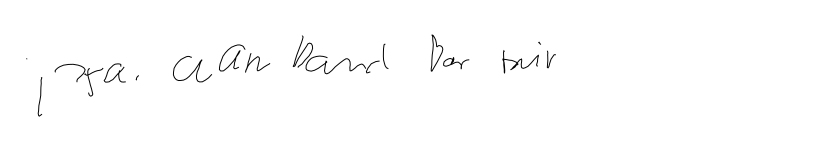

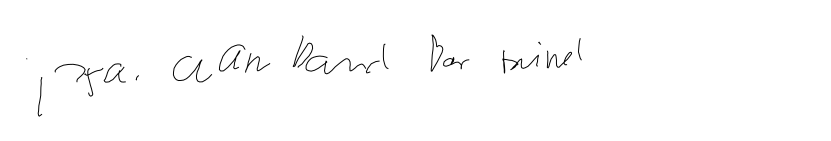

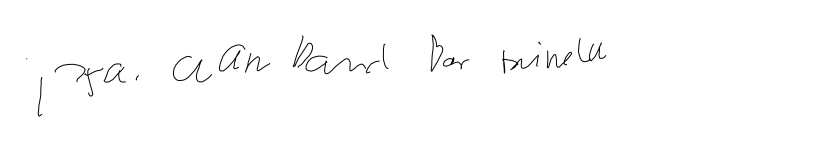

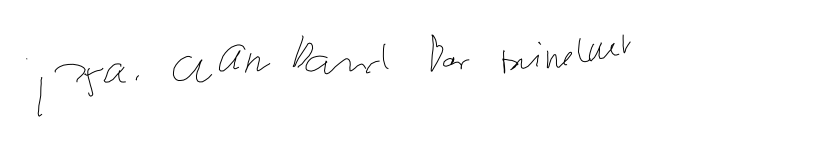

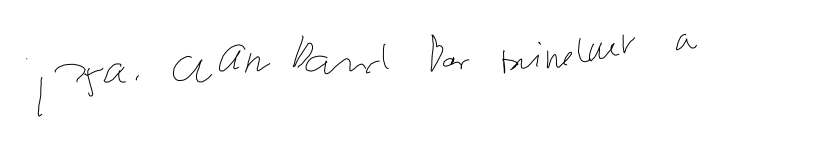

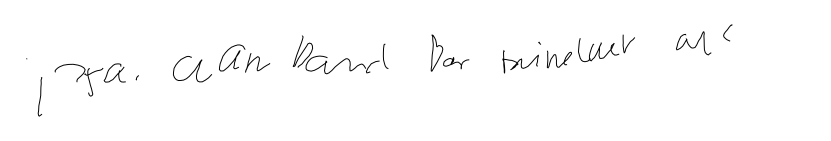

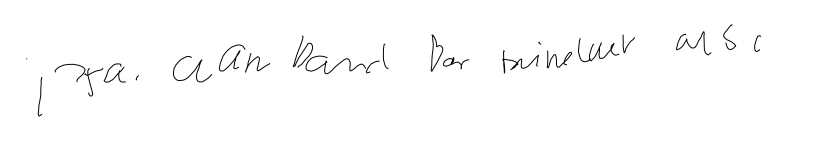

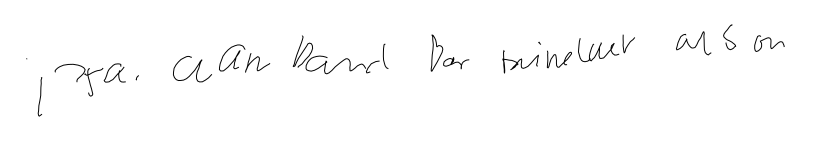

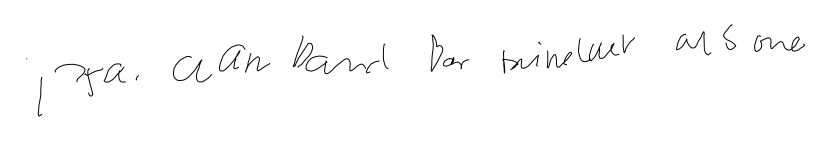

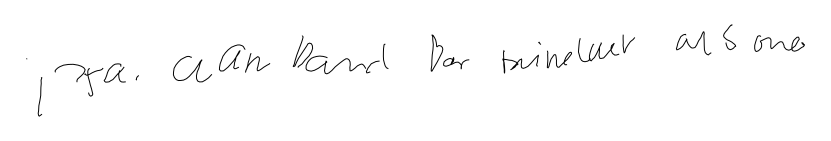

In [56]:
for i in range(1, len(strokes)):
    if (i % GIF_STEP) == 0:
        dwg_ = draw_inter_strokes(strokes[:i], 10, min_x, max_x, min_y, max_y)   
        display(SVG(dwg_.tostring()))

In [93]:
svg = draw_inter_strokes(strokes, 10, min_x, max_x, min_y, max_y)   
print(svg)

In [87]:
import subprocess

In [98]:
convert = subprocess.run(['convert', '-density', '1200', 'temp.svg', 'temp.png'])

In [101]:
import matplotlib.pyplot as plt

In [107]:
%matplotlib inline

In [102]:
img = plt.imread('temp.png')

In [103]:
print(img)

[[[ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  ..., 
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]]

 [[ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  ..., 
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]]

 [[ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  ..., 
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]]

 ..., 
 [[ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  ..., 
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]]

 [[ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  ..., 
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]]

 [[ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  ..., 
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]]]


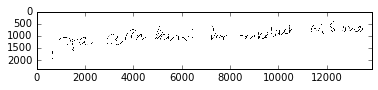

In [108]:
plt.imshow(img)

In [114]:
size = img.shape[0]
print(size)

2366


In [123]:
def img_crop(img, pos):
    """Crop to square from a position.

    Parameters
    ----------
    img : np.ndarray
        Input image to crop, assumed at least 2d.
    pos : int
        Start position.

    Returns
    -------
    crop : np.ndarray
        Cropped image.
    """
    size = img.shape[0]
    crop = np.take(img, range(pos, pos + size), axis=1)
    return crop

[[[ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  ..., 
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]]

 [[ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  ..., 
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]]

 [[ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  ..., 
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]]

 ..., 
 [[ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  ..., 
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]]

 [[ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  ..., 
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]]

 [[ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  ..., 
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]]]
(2366, 2366, 4)


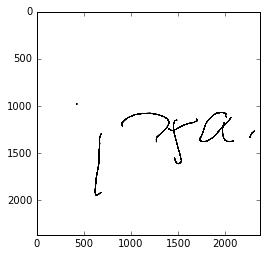

In [132]:
test_crop = img_crop(img, 0)
print(test_crop)
print(test_crop.shape)
plt.imshow(test_crop)

[[[ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  ..., 
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]]

 [[ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  ..., 
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]]

 [[ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  ..., 
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]]

 ..., 
 [[ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  ..., 
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]]

 [[ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  ..., 
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]]

 [[ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  ..., 
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]]]
(2366, 2366, 4)


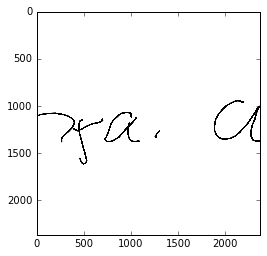

In [133]:
test_crop = img_crop(img, 1000)
print(test_crop)
print(test_crop.shape)
plt.imshow(test_crop)

In [135]:
def build_gif(imgs, interval=0.1, dpi=72,
              save_gif=True, saveto='animation.gif',
              show_gif=False, cmap=None):
    """Take an array or list of images and create a GIF.

    Parameters
    ----------
    imgs : np.ndarray or list
        List of images to create a GIF of
    interval : float, optional
        Spacing in seconds between successive images.
    dpi : int, optional
        Dots per inch.
    save_gif : bool, optional
        Whether or not to save the GIF.
    saveto : str, optional
        Filename of GIF to save.
    show_gif : bool, optional
        Whether or not to render the GIF using plt.
    cmap : None, optional
        Optional colormap to apply to the images.

    Returns
    -------
    ani : matplotlib.animation.ArtistAnimation
        The artist animation from matplotlib.  Likely not useful.
    """
    imgs = np.asarray(imgs)
    h, w, *c = imgs[0].shape
    fig, ax = plt.subplots(figsize=(np.round(w / dpi), np.round(h / dpi)))
    fig.subplots_adjust(bottom=0)
    fig.subplots_adjust(top=1)
    fig.subplots_adjust(right=1)
    fig.subplots_adjust(left=0)
    ax.set_axis_off()

    if cmap is not None:
        axs = list(map(lambda x: [
            ax.imshow(x, cmap=cmap)], imgs))
    else:
        axs = list(map(lambda x: [
            ax.imshow(x)], imgs))

    ani = animation.ArtistAnimation(
        fig, axs, interval=interval*1000, repeat_delay=0, blit=True)

    if save_gif:
        ani.save(saveto, writer='imagemagick', dpi=dpi)

    if show_gif:
        plt.show()

    return ani